In [17]:
# notebook for testing Markov class
# set up a landscape and calculate the current

import numpy as np
import imp
import sys
import os
import matplotlib.pyplot as plt
%matplotlib inline

sys.path.append(os.path.expanduser('~/quantum-ml/nanowire_model'))

import potential_profile
import markov
import thomas_fermi
imp.reload(markov)
imp.reload(thomas_fermi)
import tunneling
imp.reload(tunneling)
import exceptions

# physical parameters
E_scale = 'eV'
dx_scale = '1e-9'

kT = 1000e-6
b1 = (-200e-3,-0.31,0.1,1)
d = (300e-3,0.0,0.1,1)
b2 = (-200e-3,0.31,0.1,1)

x = np.linspace(-1,1,25)
V = potential_profile.V_x_wire(x,[b1,d,b2])

K_onsite = 5e-3
sigma = x[1] - x[0]
x_0 = (x[1] - x[0])
mu_l = (100.0e-3,100.1e-3)
battery_weight = 100

physics_model = (E_scale,dx_scale,kT,x,V,K_onsite,sigma,x_0,mu_l,battery_weight)

# graph parameters
#graph_model = (2,1)

graph = markov.Markov(graph_model,physics_model)

N = (0,4,0)
#check validity
#print(graph.check_validity(N))

# neighbours
#neigh = graph.generate_neighbours(N) 
#print(neigh)

# find weight
u = (1,3,0)
v = (0,4,0)
wt = graph.find_weight(u,v)
print(wt)

# aha, finally we test the generate graph
#graph.generate_graph()

#print(graph.get_current())

5.52532894654


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99


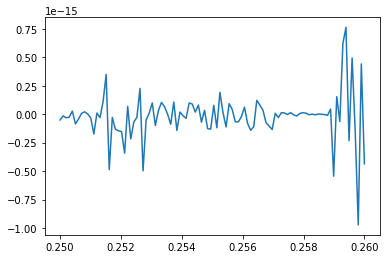

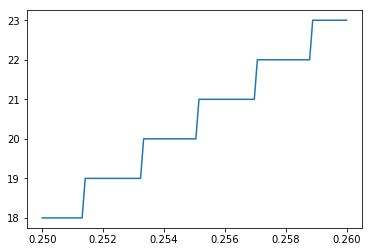

In [27]:
# lets take an IV
# physics defined above
import imp
imp.reload(thomas_fermi)
imp.reload(markov)
imp.reload(tunneling)
V_d_vec = np.linspace(250e-3,260e-3,100)
I_vec = np.zeros(len(V_d_vec))
charge_state = np.zeros(len(V_d_vec))
tf_strategy = 'simple'
kT = 400e-6
K_onsite = 1e-3
battery_weight = 100
for i in range(len(V_d_vec)):
    print(i)
    d = (V_d_vec[i],0.0,0.1,1) 
    V = potential_profile.V_x_wire(x,[b1,d,b2])
    physics_model = (E_scale,dx_scale,kT,x,V,K_onsite,sigma,x_0,mu_l,battery_weight)
    
    # graph parameters
    graph_model = (10,1)
    
    graph = markov.Markov(graph_model,physics_model,tf_strategy)
    graph.generate_graph()
    
    I_vec[i] = graph.get_current()
    charge_state[i] = graph.get_charge_state()[0]

    del graph
plt.figure(1)
plt.plot(V_d_vec,I_vec)
plt.figure(2)
plt.plot(V_d_vec,charge_state)  

In [ ]:
import networkx as nx
nx.draw_networkx(graph.G)

In [ ]:
print(graph.battery_ind)

In [ ]:
print(graph.G.edges(data=True))

In [ ]:
%pdb

In [ ]:
print(graph.tf.V)